# K-Means

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.

#Database
This data consist of <br>

RowNumber<br>
CustomerId<br>
Surname<br>
CreditScore<br>
Geography<br>
Gender<br>
Age<br>
Tenure<br>
Balance<br>
NumOfProducts<br>
HasCrCard<br>
IsActiveMember<br>
EstimatedSalary<br>
Exited<br>

**Dataset can be found at:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling** 

We will apply churn modeling using K-means.

# Churn Problem

Customer churn is a costly toll on businesses. It’s not simply the lost revenue to consider, but also the added marketing expenses needed to rectify the loss. Retaining customers has historically been a lagging business indicator—it’s only after businesses lost customers that they could assess what went wrong—but with increasing access to data, several companies have developed predictive churn analysis capabilities to identify at-risk customers and proactively prevent them from leaving.

## Importing  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the data-set

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Key tributes are creditscore, balance and estimated salary to generate cluster.<br>1st we consider only balance and estimated salary.**

In [4]:
x = dataset.iloc[:, [8, 12]].values # as we need numpy array

In [5]:
x

array([[     0.  , 101348.88],
       [ 83807.86, 112542.58],
       [159660.8 , 113931.57],
       ...,
       [     0.  ,  42085.58],
       [ 75075.31,  92888.52],
       [130142.79,  38190.78]])

In [6]:
type(x)

numpy.ndarray

## Elbow method to find the optimal number of clusters

In [7]:
from sklearn.cluster import KMeans

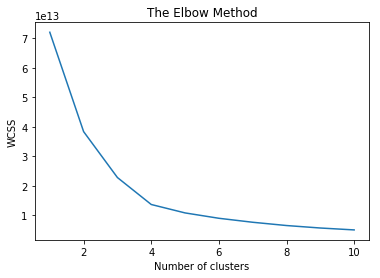

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-means is all about the analysis-of-variance paradigm. ANOVA - both uni- and multivariate - is based on the fact that the sum of squared deviations about the grand centroid is comprised of such scatter about the group centroids and the scatter of those centroids about the grand one: SStotal=SSwithin+SSbetween. So, if SSwithin is minimized then SSbetween is maximized.**

**SS of deviations of some points about their centroid (arithmetic mean) is known to be directly related to the overall squared euclidean distance between the points: the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. (This is the direct extension of the trigonometric property of centroid. And this relation is exploited also in the double centering of distance matrix.)**

**Thus, saying "SSbetween for centroids (as points) is maximized" is alias to say "the (weighted) set of squared distances between the centroids is maximized"**.

**we will go for 4 clusters**

## Applying k-means

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [10]:
y_kmeans

array([3, 1, 1, ..., 2, 0, 0])

## Visulizing the clusters

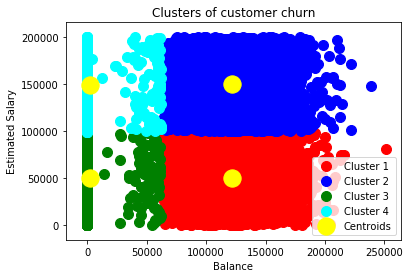

In [12]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Cluster 1') # s shows zoom level of plot
# x has two columns and we are taking all those clusters with zero in two columns
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customer churn')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Couple of comments about this plot. Starting with problem centroid. Centroid of cluster 3 and 4 are not well psoitioned.**<br>


**About clusters , same clusters 3 and 4 are showing a straight vertical line that represents noise in our data. If we want to interpret(starting from cluster 3) then it means that customers with zero balance may have estimated salaries from 0-10K. This could be possible only if customers are not using account or have transfered amount to other bank. Either way, it is not a good sign. Especially, in cluster 4 where peak point shows customers with higher estimated salaries but, they have zero balance.**<br> 

**Cluster 2 shows "rich" customers having higher salaries and have high balance which is of high value. Moreover, they have higher density. There are some outlier values have very large balance of around 25 K. That makes sense if you have salary range of 150K as in cluster 2. This does not suit to lower range of cluster. Perhaps these are exceptional cases.**<br>

**Cluster 1 is of those having medium to low salary and hence their balance is inline with that. They are careful customers and their density is also very high. There are some customers who have low estimated salary but, they have higher balance. This needs a more comprehensive analysis. There could be reason that they do good savings, or perhaps they have got loans i.e students etc. However, this cluster needs further analysis.**